<a href="https://colab.research.google.com/github/rohanblueboybaijal/pclub_selection/blob/master/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets

In [0]:
diabetes = datasets.load_diabetes()
X = diabetes.data
#type(X)
#X.shape (442, 10) => 10 features
y = diabetes.target.reshape(-1,1)

In [0]:
def Loss(X, weights, y):
  y = y.reshape(-1,)
  return np.mean(np.square(X@weights - y))

In [0]:
def S(rho, lamda) :
# Soft threshold for normalized data
  if rho < -lamda :
    return (rho + lamda)
  elif rho > lamda :
    return (rho - lamda)
  else:
    return 0

In [0]:
def coordinate_descent_algo (weights, X, y, lamda=0.01, iters = 50, constant_term=False) :
  
  m = X.shape[0]
  n = X.shape[1]
  X = X/(np.linalg.norm(X,axis=0)) #Normalize

  for i in range (iters) :
    for j in range (n):
      yhat = np.matmul(X, weights)
      Xj = X[:, j].reshape(-1,1)
      rho = y - yhat + weights[j]*Xj
      XjT = np.transpose(Xj)
      rho = np.matmul(XjT, rho)

      if constant_term == True:
        if j==0:
          weights[j] = rho
        else:
          weights[j] = S(rho, lamda)
      
      else:
        weights[j] = S(rho, lamda)

  return weights.flatten()


(442, 1)
(10, 300)


(0.06309573444801933, 1584.893192461114, -847.5707140280173, 819.7070858741896)

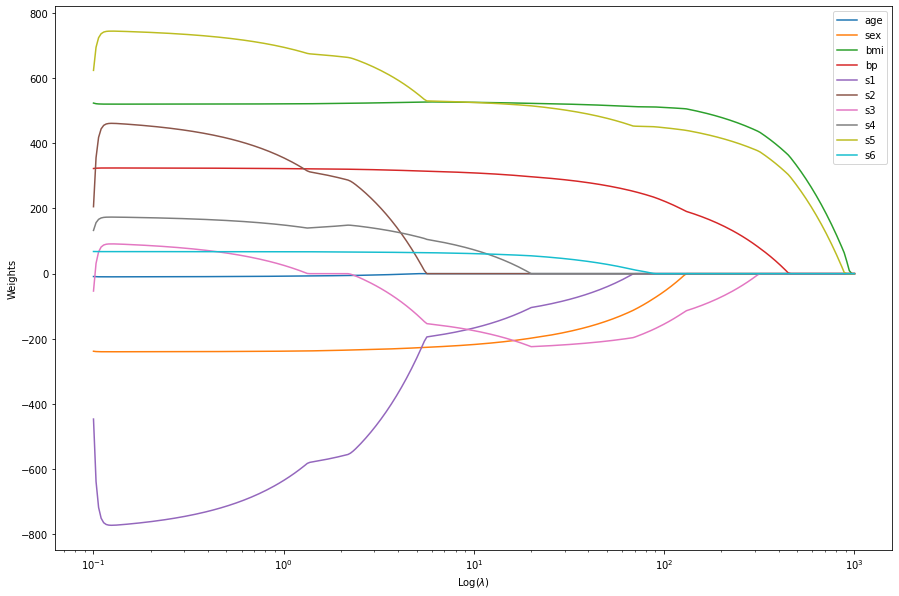

In [12]:
m,n = X.shape
initial_weight = np.ones((n,1))
weight_history = list()
lamda = np.logspace(0,4,300)/10 

print((X@initial_weight).shape)

loss = []

for l in lamda:
    weights = coordinate_descent_algo(initial_weight,X,y,lamda = l,iters=50)
    weight_history.append(weights)
    L = Loss(X, weights, y)
    loss.append(L)

lasso_weights = np.stack(weight_history).T

n,m = lasso_weights.shape
print(lasso_weights.shape)
plt.figure(figsize = (15,10))

for i in range(n):
    plt.plot(lamda, lasso_weights[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Weights')
plt.legend()
plt.axis('tight')



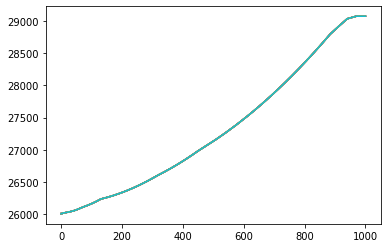

In [16]:
for i in range(n):
    plt.plot(lamda, loss, label = 'Loss')

(1.2079336708298056e-05,
 3.8198216622302783,
 -867.7098424098474,
 827.7913320824183)

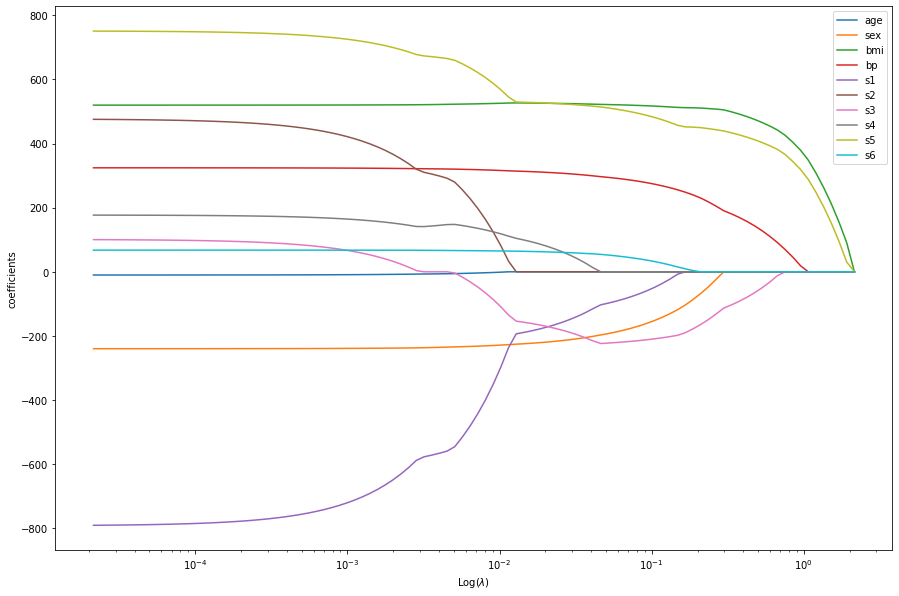

In [0]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X = X/(np.linalg.norm(X, axis =0))
n=X.shape[1]

epsilon = 0.00001

alphas, coefs, _ = linear_model.lasso_path(X, y, epsilon, fit_intercept=False)

plt.figure(figsize = (15,10))

for i in range(n):
  plt.plot(alphas, coefs[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.legend()
plt.axis('tight')

